# LSTM

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
 - 341s - loss: 0.5030 - accuracy: 0.7527 - val_loss: 0.4688 - val_accuracy: 0.7776
Epoch 2/3
 - 341s - loss: 0.3345 - accuracy: 0.8600 - val_loss: 0.3523 - val_accuracy: 0.8562
Epoch 3/3
 - 340s - loss: 0.2714 - accuracy: 0.8908 - val_loss: 0.3940 - val_accuracy: 0.8326
Test score 0.39395604986190796
Test accuracy 0.8325600028038025


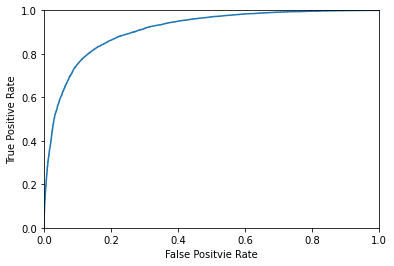

0.9110737951999999
[[11006  1494]
 [ 2692  9808]]


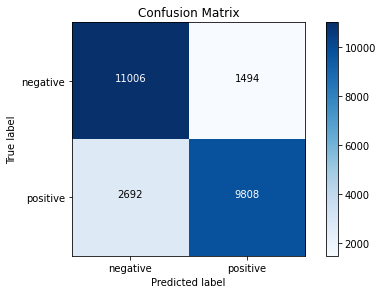

<Figure size 432x288 with 0 Axes>

In [1]:
import tensorflow 
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import numpy as np


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)
x_train = sequence.pad_sequences(x_train, maxlen =400)
x_test = sequence.pad_sequences(x_test, maxlen = 400)


model = Sequential()

model.add(Embedding(20000,128))

model.add(LSTM(128,dropout = 0.2, recurrent_dropout=0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


model.fit(x_train, y_train,
         batch_size=32,
         epochs=3,
         verbose=2,
         validation_data=(x_test,y_test))

# model.save('LSTM_3epochs_5000NW.h5')

# from keras.models import load_model
# LSTM_3epochs = load_model('LSTM_3epochs_5000NW.h5')

score, acc = model.evaluate(x_test, y_test,
                           batch_size = 32,
                           verbose = 2)
print('Test score',score)
print('Test accuracy',acc)

# #ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# #Storing predictions
y_prob = model.predict(x_test)

#Comparing the actual values and predictions
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positvie Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
plot_roc_curve(fpr,tpr)

auc_score = roc_auc_score(y_test, y_prob)
print(auc_score)

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

rounded_predictions = model.predict_classes(x_test)
cm = confusion_matrix(y_test,rounded_predictions)

def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


cm_plot_labels = ["negative","positive"]
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')
fig = plt.figure()



# CNN 1-layer

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Build model...


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 12s 484us/step - loss: 0.4209 - accuracy: 0.7871 - val_loss: 0.2675 - val_accuracy: 0.8890
Epoch 2/3
25000/25000 [==============================] - 10s 419us/step - loss: 0.2100 - accuracy: 0.9189 - val_loss: 0.2575 - val_accuracy: 0.8958
Epoch 3/3
25000/25000 [==============================] - 10s 418us/step - loss: 0.1132 - accuracy: 0.9604 - val_loss: 0.3037 - val_accuracy: 0.8815
Test score 0.30369322367191315
Test accuracy 0.8814799785614014


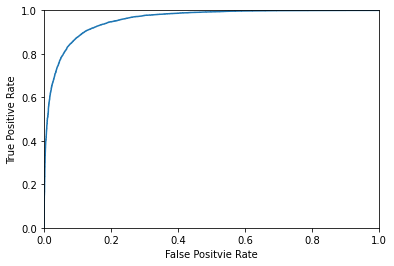

0.9571202175999999
[[11600   900]
 [ 2063 10437]]


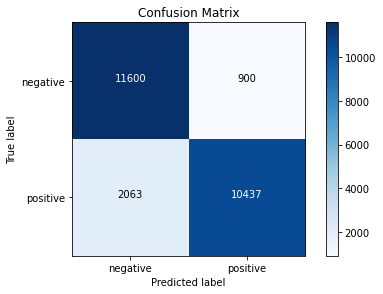

In [2]:
# CNN 1D 3epochs

from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Dense, Dropout, Activation
# set parameters:
max_features = 20000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 3

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

# model.save('Conv1D_3epochs_5000NW.h5')  # creates a HDF5 file 'my_model.h5'

# from keras.models import load_model
# model2 = load_model('Conv1D_3epochs_5000NW.h5')

score, acc = model.evaluate(x_test, y_test,
                           batch_size = 32,
                           verbose = 2)
print('Test score',score)
print('Test accuracy',acc)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positvie Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
plot_roc_curve(fpr,tpr)

auc_score = roc_auc_score(y_test, y_prob)
print(auc_score)

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

rounded_predictions = model.predict_classes(x_test)
cm = confusion_matrix(y_test,rounded_predictions)

def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


cm_plot_labels = ["negative","positive"]
plt = plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')



# Bi LSTM

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Train...


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 628s 25ms/step - loss: 0.4372 - accuracy: 0.8012 - val_loss: 0.3498 - val_accuracy: 0.8627
Epoch 2/3
25000/25000 [==============================] - 628s 25ms/step - loss: 0.2497 - accuracy: 0.9065 - val_loss: 0.3307 - val_accuracy: 0.8620
Epoch 3/3
25000/25000 [==============================] - 626s 25ms/step - loss: 0.1750 - accuracy: 0.9370 - val_loss: 0.3739 - val_accuracy: 0.8701
Test score 0.3738866700315475
Test accuracy 0.8701199889183044


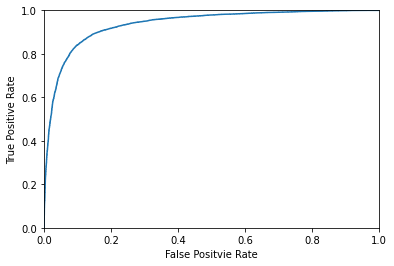

0.9372124288000001
[[11316  1184]
 [ 2063 10437]]


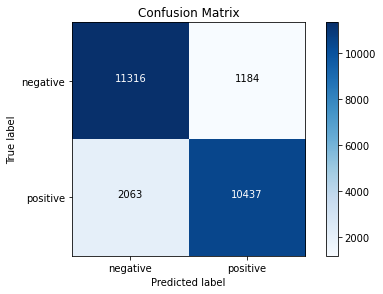

In [3]:
# Bi directional lstm 3 epochs

from __future__ import print_function
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb


max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 400
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])



print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=[x_test, y_test])

# model.save('lstmBi_3epochs_5000NW.h5')

# from keras.models import load_model
# model3 = load_model('lstmBi_3epochs_5000NW.h5')

score, acc = model.evaluate(x_test, y_test,
                           batch_size = 32,
                           verbose = 2)
print('Test score',score)
print('Test accuracy',acc)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positvie Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
plot_roc_curve(fpr,tpr)

auc_score = roc_auc_score(y_test, y_prob)
print(auc_score)

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

rounded_predictions = model.predict_classes(x_test)

#Defining confusion matrix
cm = confusion_matrix(y_test,rounded_predictions)


def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ["negative","positive"]
plt = plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')



# GRU

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 100)          2000000   
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60300     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 2,060,401
Trainable params: 2,060,401
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
25000/25000 [==============================] - 326s 13ms/step - loss: 0.4274 - accuracy: 0.7976
Epoch 2/3
25000/25000 [==============================] - 326s 13ms/step - loss: 0.2155 - accuracy: 0.9169
Epoch 3/3
25000/25000 [==============================] - 63s 3ms/step
Test score 0.3431313277339935
Test accuracy 0.8827999830245972


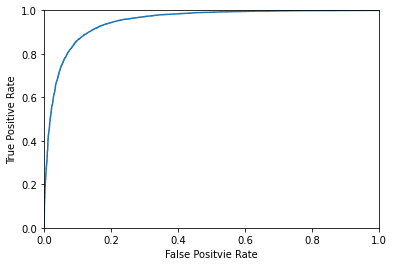

0.9490315840000001
[[10675  1825]
 [ 1105 11395]]


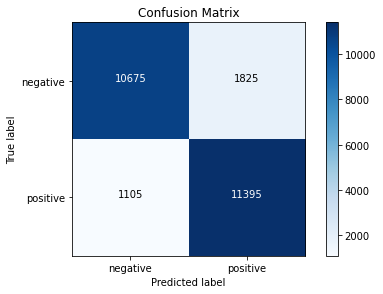

In [4]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, GRU, Flatten, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 20000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# only take 500 words per review
max_words = 400
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 100, input_length=max_words))
model.add(GRU(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train
model.fit(X_train, y_train, epochs=3, batch_size=32)

# # Final evaluation of the model
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

score, acc = model.evaluate(X_test, y_test,
                           batch_size = 32)

# print('Test score',score)
# print('Test accuracy',acc)

# # Predict the label for test data
# #y_predict = model.predict(X_test)
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# y_prob = model.predict(x_test)

# auc_score = roc_auc_score(y_test, y_prob)
# auc_score


# score, acc = model.evaluate(x_test, y_test,
#                            batch_size = 32,
#                            verbose = 2)
print('Test score',score)
print('Test accuracy',acc)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positvie Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
plot_roc_curve(fpr,tpr)

auc_score = roc_auc_score(y_test, y_prob)
print(auc_score)

import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

rounded_predictions = model.predict_classes(X_test)
cm = confusion_matrix(y_test,rounded_predictions)

def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


cm_plot_labels = ["negative","positive"]
plt = plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')

